# 外部资料参考1

## Python矩阵作图库matplotlib的初级使用

https://www.cnblogs.com/xxhbdk/p/10040400.html

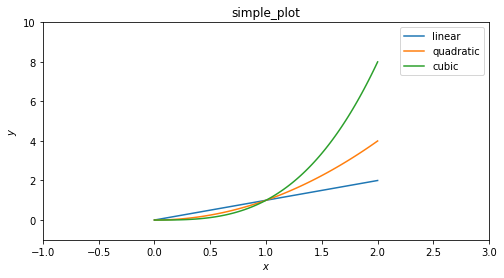

In [1]:
#简单作图示例

import numpy
import matplotlib.pyplot as plt

x = numpy.linspace(0, 2, 100)

plt.figure(figsize=(8, 4))

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

# 设置展示区间
plt.xlim(-1, 3)
plt.ylim(-1, 10)

# 设置展示信息
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('simple_plot')
plt.legend(loc='best')

# 保存图片
plt.savefig(fname='test_plot.png', dpi=500)

# 展示图片
plt.show()
# 关闭图片
plt.close()

#### 复杂作图示例：
#### 明确三层作图对象：
1. 整个图片对象 → figure
2. 图片内的子图对象 → axes
3. 子图内的轴对象 → axis

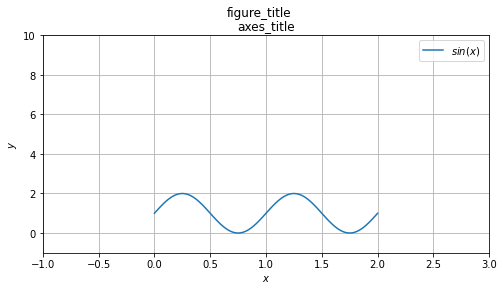

In [2]:
import numpy
import matplotlib.pyplot as plt

# 明确三层作图对象: figure, axes, axis
# 整个图片对象, 图片内的子图对象, 子图内的轴对象

x = numpy.linspace(0, 2, 100)
y = 1 + numpy.sin(2 * numpy.pi * x)

# 创建图片对象
fig = plt.figure(figsize=(8, 4))
fig.suptitle('figure_title')

# 创建子图对象
axes = plt.subplot()
axes.plot(x, y, label='$sin(x)$')
axes.set(xlim=(-1, 3), ylim=(-1, 10), xlabel='$x$', ylabel='$y$', title='axes_title')
axes.grid()
axes.legend()

# fig.tight_layout()
fig.savefig('test_plot.png', dpi=500)

plt.show()
plt.close()

### 复杂作图
#### 多类型示例


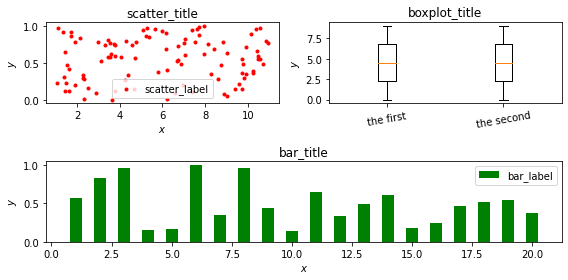

In [3]:
import numpy
import matplotlib.pyplot as plt

# 创建图片对象
fig = plt.figure(figsize=(8, 4))

# 创建子图对象
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 1, 2)

# 散点图
ax1.scatter(numpy.random.uniform(1, 11, 100), numpy.random.random(100), color='r', marker='.', label='scatter_label')
ax1.set(xlabel='$x$', ylabel='$y$', title='scatter_title')
ax1.legend()

# 盒型图
ax2.boxplot([numpy.arange(10), numpy.arange(10)])
ax2.set_xticklabels(['the first', 'the second'], rotation=10)   # 重置坐标轴刻度并旋转
ax2.set(ylabel='$y$', title='boxplot_title')

# 条形图
ax3.bar(numpy.arange(1, 21), numpy.random.random(20), width=0.5, color='g', label='bar_label')
ax3.set(xlabel='$x$', ylabel='$y$', title='bar_title')
ax3.legend()

fig.tight_layout()
fig.savefig('test_plot.png', dpi=500)

plt.show()
plt.close()

#### 复杂作图
#### 3D类型示例：

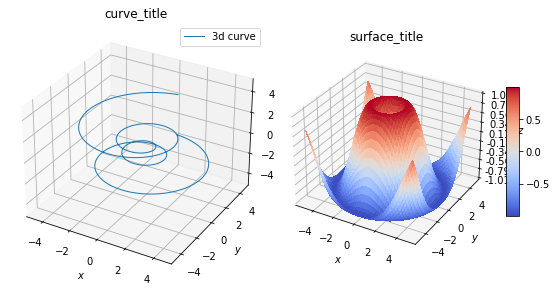

In [7]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D                     # 该模块并未直接使用, 但必须导入, 否则无法识别下面的projection='3d'


# 子图1的数据 - 一条曲线
theta = numpy.linspace(-4*numpy.pi, 4*numpy.pi, 500)
z1 = numpy.linspace(-2, 2, 500)
r = z1**2 + 1
x1 = r * numpy.sin(theta)
y1 = r * numpy.cos(theta)

# 子图2的数据 - 一个曲面
x2 = numpy.linspace(-5, 5, 100)
y2 = numpy.linspace(-5, 5, 100)
x2, y2 = numpy.meshgrid(x2, y2)                             # 生成网格
length = numpy.sqrt(x2**2 + y2**2)
z2 = numpy.sin(length)

# 创建图片对象
fig = plt.figure(figsize=(8, 4))

# 创建子图对象
ax1 = plt.subplot(1, 2, 1, projection='3d')                 # projection='3d'标记该子图为3D子图
ax2 = plt.subplot(1, 2, 2, projection='3d')

ax1.plot(x1, y1, z1, linewidth=1, label='3d curve')
ax1.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5),xlabel='$x$', ylabel='$y$', zlabel='$z$', title='curve_title')
ax1.legend()

surf = ax2.plot_surface(x2, y2, z2, cmap=cm.coolwarm, antialiased=False)
ax2.set(zlim=(-1.01, 1.01), xlabel='$x$', ylabel='$y$', zlabel='$z$', title='surface_title')
# 设置子图内的轴对象
ax2.zaxis.set_major_locator(LinearLocator(10))              # z轴上的总刻度数
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))  # z轴上刻度的格式

fig.colorbar(surf, shrink=0.5, aspect=10)                   # 展示颜色棒

fig.tight_layout()
#fig.savefig('test_plot.png', dpi=500)

plt.show()
plt.close()